**AUTHORS: Suman Lohit, I-Ching Wang**

# Classification: BANK MARKETING DATASET

Abstract: The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. (source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ). The classification goal is to predict if the client will subscribe to a term deposit (variable y) or not. 

The dataset we are using has 5000 rows and 21 columns including the target variable. Here is a brief description of the features of the dataset:
1. age (numeric)
2. job : type of job (categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed")
3. marital : marital status 
(categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)
4. education
(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree")
5. default: has credit in default? (categorical: "no","yes")
6. housing: has housing loan? (categorical: "no","yes")
7. loan: has personal loan? (categorical: "no","yes")
   
   Related with the last contact of the current campaign:
8. contact: contact communication type 
(categorical: "cellular","telephone") 
9. month: last contact month of year 
(categorical: "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week 
(categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note: The duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
   
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
      social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")



In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv("bank.csv", sep = ',', index_col=0)


First we find how many null values are in the dataset. 

In [3]:
bank.isna().sum()


age                 0
job                39
marital            13
education         227
default           833
housing           112
loan              112
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

Since there are very few missing values, we are turning more than 5% of the data to nulls.

In [4]:
import random
random.seed(555)
for col in bank.columns:
    if(col != 'y'):
        fraction = random.uniform(0.04,0.06)
        bank.loc[bank.sample(frac=fraction).index, col] = np.nan 


In [5]:
missing_count  = bank.isna().sum().sum()
total_count = len(bank.columns)*len(bank.index)
missingPercent = missing_count*100/total_count
missingPercent

5.79047619047619

Now we have 6% as nulls.

# EDA

We check some basic information and statistics of the dataset.

In [6]:
bank.shape  #There are 5000 rows and 21 columns.

(5000, 21)

In [7]:
bank.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4781.000000,4787.000000,4797.000000,4751.000000,4796.000000,4788.000000,4767.000000,4740.000000,4714.000000,4759.000000
mean,40.295545,350.415918,2.353763,907.455062,0.277731,-0.332331,93.502592,-40.198291,3.156136,5145.105694
std,11.606839,335.280458,2.303163,287.300172,0.663366,1.695712,0.614034,5.145339,1.870446,84.305342
min,17.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,133.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.262000,5099.100000
50%,38.000000,239.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.153000,5191.000000
75%,47.000000,449.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.960000,5228.100000
max,98.000000,3643.000000,35.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'duration'}>,
       <AxesSubplot:title={'center':'campaign'}>,
       <AxesSubplot:title={'center':'pdays'}>,
       <AxesSubplot:title={'center':'previous'}>,
       <AxesSubplot:title={'center':'emp.var.rate'}>,
       <AxesSubplot:title={'center':'cons.price.idx'}>,
       <AxesSubplot:title={'center':'cons.conf.idx'}>,
       <AxesSubplot:title={'center':'euribor3m'}>,
       <AxesSubplot:title={'center':'nr.employed'}>], dtype=object)

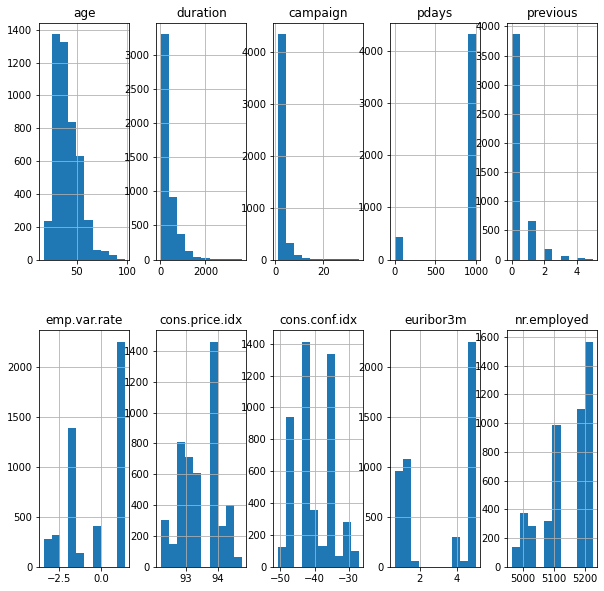

In [10]:
#histogram
fig, axis= plt.subplots(2,5, figsize= (10,10))
bank[bank.columns[bank.dtypes== np.float]].hist(ax= axis)

We can see that a few variables are skewed to the right, but since we are dealing with Machine Learning and have a reasonably large number of records, non-normality is not an isssue. 

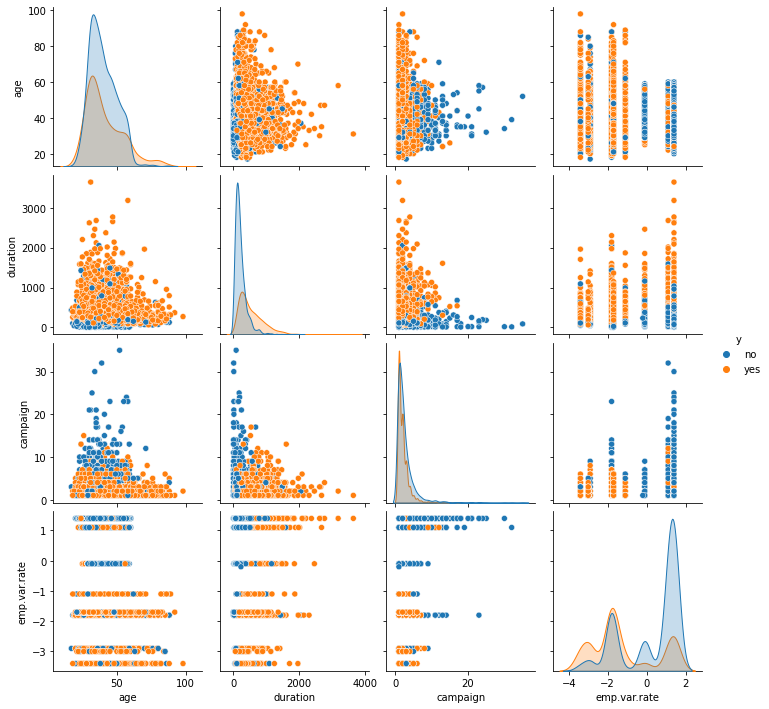

In [11]:
# Pair plots of numerical variables

sns.pairplot(bank,x_vars=['age','duration','campaign', 'emp.var.rate'], y_vars=['age','duration','campaign', 'emp.var.rate'], hue= 'y')

We notice that there is a significantly high number of 'no's when the Duration is 0. When Age of the client is more than 60 years, they are more likely to say "yes". When the emp.var.rate is greater than 0, the 'no's are markedly greater than 'yes's.

array([<AxesSubplot:title={'center':'no'}>,
       <AxesSubplot:title={'center':'yes'}>], dtype=object)

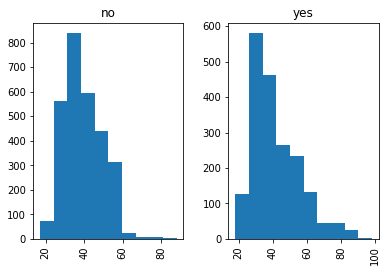

In [12]:
# Distribution of the 'y' variable by class

bank[['age','y']].hist(by ='y')
#bank[['age','y']][bank.y == 'yes'].hist()

Until the Age 50, in terms of distribution, there is no significant difference. However after 60 years, rate of 'yes' is more.

In [13]:
import pylab as plt
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4781 non-null   float64
 1   job             4748 non-null   object 
 2   marital         4732 non-null   object 
 3   education       4497 non-null   object 
 4   default         3982 non-null   object 
 5   housing         4648 non-null   object 
 6   loan            4638 non-null   object 
 7   contact         4725 non-null   object 
 8   month           4740 non-null   object 
 9   day_of_week     4798 non-null   object 
 10  duration        4787 non-null   float64
 11  campaign        4797 non-null   float64
 12  pdays           4751 non-null   float64
 13  previous        4796 non-null   float64
 14  poutcome        4732 non-null   object 
 15  emp.var.rate    4788 non-null   float64
 16  cons.price.idx  4767 non-null   float64
 17  cons.conf.idx   4740 non-null   f

Next, we look into a few categorical variables.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'university.degree'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.4y'),
  Text(5, 0, 'basic.6y'),
  Text(6, 0, 'illiterate')])

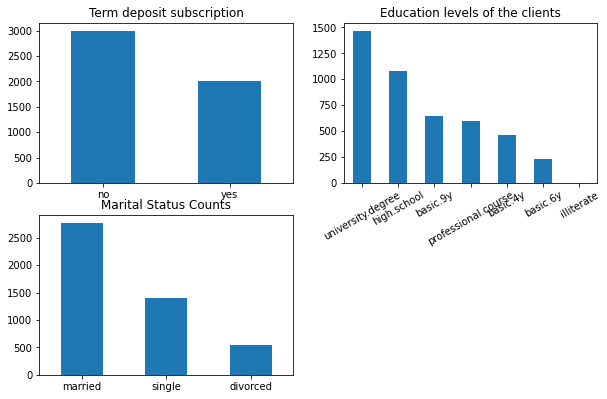

In [15]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

#plot the yes and no counts of target variable: subscribed to term deposit
plt.subplot2grid(fig_dims, (0, 0))
bank['y'].value_counts().plot(kind='bar', title='Term deposit subscription')
plt.xticks(rotation=0)


# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
bank['marital'].value_counts().plot(kind='bar', title='Marital Status Counts')
plt.xticks(rotation=0)

# plot the education levels
plt.subplot2grid(fig_dims, (0, 1))
bank['education'].value_counts().plot(kind='bar', title='Education levels of the clients')

plt.xticks(rotation=30)


We can see that around 2000 clients have replied 'yes', while the rest have said 'no'. Most of the clients have a university degree and are married.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

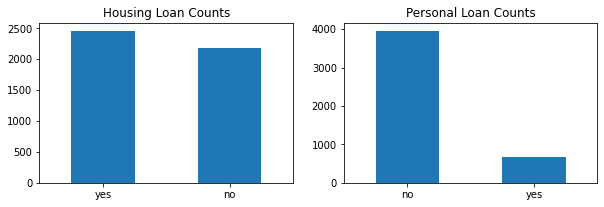

In [16]:
# Has housing loan, personal loan
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
bank['housing'].value_counts().plot(kind='bar', title='Housing Loan Counts')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (0, 1))
bank['loan'].value_counts().plot(kind='bar', title='Personal Loan Counts')
plt.xticks(rotation=0)

We see that majority of the clients have a housing loan whereas less than a thousand of the clients have a personal loan. 

y                     no  yes
education                    
basic.4y             286  178
basic.6y             158   74
basic.9y             442  207
high.school          661  418
illiterate             0    2
professional.course  358  244
university.degree    791  678


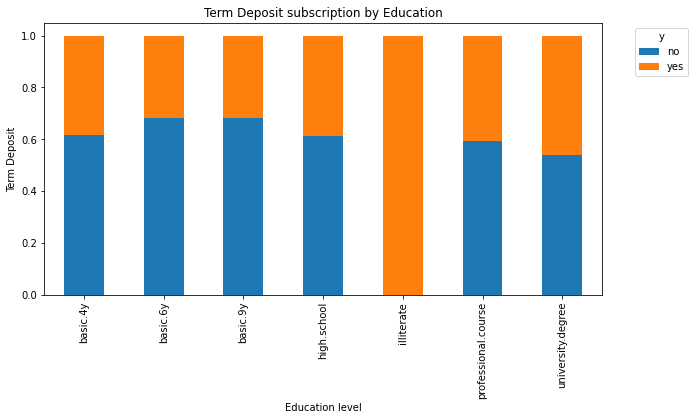

In [17]:
#  Crosstab of Education and term deposit subscription

educ_xt = pd.crosstab(bank['education'], bank['y'])
print(educ_xt)

# Normalize the cross tab to sum to 1:
educ_xt_pct = educ_xt.div(educ_xt.sum(1).astype(float), axis=0)

educ_xt_pct.plot(kind='bar', stacked=True, 
                   title='Term Deposit subscription by Education')
plt.xlabel('Education level')
plt.ylabel('Term Deposit')
plt.legend(title='y', bbox_to_anchor=(1.05, 1), loc='upper left')



Clients with university and professional degree have higher proportion of 'yes' as compared to other education categories, except illiterate which has only one example.  

y               no  yes
job                    
admin.         715  542
blue-collar    692  251
entrepreneur    99   53
housemaid       70   48
management     211  123
retired        100  176
self-employed  100   59
services       288  145
student         38  109
technician     457  329
unemployed      73   70


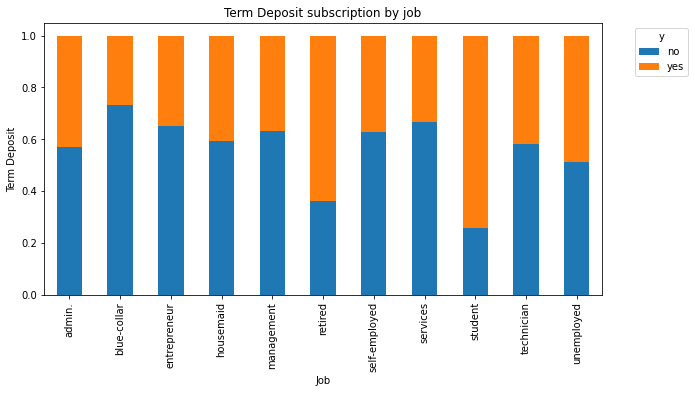

In [18]:
# Crosstab of Job and term deposit subscription 

job_xt = pd.crosstab(bank['job'], bank['y'])
print(job_xt)

# Normalize the cross tab to sum to 1:
job_xt_pct = job_xt.div(job_xt.sum(1).astype(float), axis=0)

job_xt_pct.plot(kind='bar', stacked=True, 
                   title='Term Deposit subscription by job')
plt.xlabel('Job')
plt.ylabel('Term Deposit')
plt.legend(title='y', bbox_to_anchor=(1.05, 1), loc='upper left')

The category 'student' has higher proportion of 'yes' than the other categories, while 'blue-collar' has the lowest.

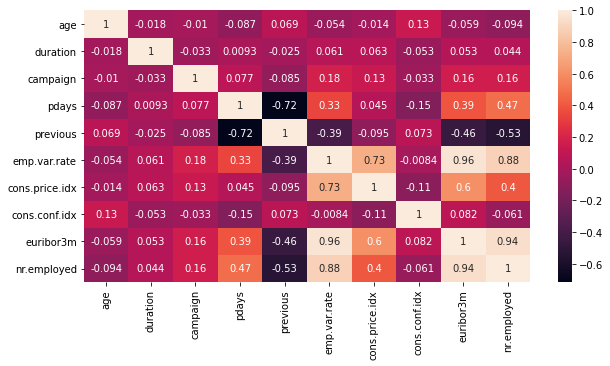

In [19]:
#Corrrelation matrix

# bank where columns have dtypes= float62
bank_cordata= bank[bank.columns[bank.dtypes == np.float64]]  

corMatrix= bank_cordata.corr()
sns.heatmap(corMatrix, annot= True)
plt.show()


Euribor3m (euribor 3 month rate) has high correlations between emp.var.rate (employee variation rate) and nr.employed. Emp.var.rate has high correlation with nr.employed. 

# Preprocess the columns. Make them numerical

In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4781 non-null   float64
 1   job             4748 non-null   object 
 2   marital         4732 non-null   object 
 3   education       4497 non-null   object 
 4   default         3982 non-null   object 
 5   housing         4648 non-null   object 
 6   loan            4638 non-null   object 
 7   contact         4725 non-null   object 
 8   month           4740 non-null   object 
 9   day_of_week     4798 non-null   object 
 10  duration        4787 non-null   float64
 11  campaign        4797 non-null   float64
 12  pdays           4751 non-null   float64
 13  previous        4796 non-null   float64
 14  poutcome        4732 non-null   object 
 15  emp.var.rate    4788 non-null   float64
 16  cons.price.idx  4767 non-null   float64
 17  cons.conf.idx   4740 non-null   f

## Handling Data Leakage

The column "Duration" refers to last contact duration, in seconds (numeric). This attribute highly affects the output target (e.g., if the duration is 0, then 'y' outcome is "no").Also, duration can not be known beforehand, it is recorded after the call. Hence we are dropping this variable from the dataset.

In [21]:
bank.drop('duration',axis=1,inplace=True)

In [22]:
bank.default.value_counts()     

no    3982
Name: default, dtype: int64

Since there are only 'no's in 'default' column, apart from the missing values, this column can be dropped.

In [23]:
bank.drop('default', axis=1,inplace=True)

In [24]:
bank.contact.value_counts(dropna=False)

cellular     3292
telephone    1433
NaN           275
Name: contact, dtype: int64

In [25]:
bank.pdays.value_counts(dropna=False).head()

999.0    4313
NaN       249
6.0       140
3.0       122
4.0        28
Name: pdays, dtype: int64

For the feature "Contact", we transform nulls into another category- "unknown" as not knowing the contact could potentially influence the output.
For all other features of 'object' type, we replace nulls with the most frequently appearing category.
We do the same for the feature "pdays", since '999' represents that the client was never contacted before, which is the most frequently occuring value.
For all other features of 'float' type, we fill the missing values with the mean of that feature. 

In [26]:
for col in bank.columns:
    if col == 'contact':
        bank[col].replace(np.nan,'unknown',inplace = True)
    elif (bank.dtypes[col] == np.object) or (col == 'pdays'):
        mode= bank[col].mode()[0]
        bank[col].replace(np.nan, mode, inplace=True)
    else:
        bank[col]= bank[col].fillna((round(bank[col].mean()))) 


Now that we have completed filling all the null values, next we focus on transforming the columns to make them more apt for machine learning models. 

In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   job             5000 non-null   object 
 2   marital         5000 non-null   object 
 3   education       5000 non-null   object 
 4   housing         5000 non-null   object 
 5   loan            5000 non-null   object 
 6   contact         5000 non-null   object 
 7   month           5000 non-null   object 
 8   day_of_week     5000 non-null   object 
 9   campaign        5000 non-null   float64
 10  pdays           5000 non-null   float64
 11  previous        5000 non-null   float64
 12  poutcome        5000 non-null   object 
 13  emp.var.rate    5000 non-null   float64
 14  cons.price.idx  5000 non-null   float64
 15  cons.conf.idx   5000 non-null   float64
 16  euribor3m       5000 non-null   float64
 17  nr.employed     5000 non-null   f

In [28]:
bank.month.value_counts()


may    1604
jul     738
aug     732
jun     588
nov     492
apr     381
oct     150
mar     138
sep     134
dec      43
Name: month, dtype: int64

We perform one-hot encoding for the following multiclass categorical variables that can not be ordered in any way- job, marital, contact , poutcome.

In [29]:
#one hot encoding

for col2 in ['job','marital','contact', 'poutcome']:
    cols = pd.get_dummies(bank[col2], prefix= col2)
    bank[cols.columns] = cols
    bank.drop(col2, axis = 1, inplace = True)


For the binary colummns : 'housing' and 'loan', we replace the class names with zeros and ones based one their frequency of occurrence. The most frequently occurring class is mapped to 1 and the other to 0.    

In [30]:
bank.housing.value_counts()

yes    2815
no     2185
Name: housing, dtype: int64

In [31]:
bank.loan.value_counts()

no     4327
yes     673
Name: loan, dtype: int64

In [32]:
# housing: yes= 1, no= 0
# loan : no= 1, yes= 0

bank.housing.replace(('yes', 'no'), (1,0), inplace=True)
bank.loan.replace(('yes', 'no'), (0,1), inplace=True)


Features like month, day_of_week and education can be ordered according to their value.

In [33]:
monthDict = {"mar":0,"apr":1,"may":2,"jun":3,"jul":4,"aug":5,"sep":6,"oct":7,"nov":8,"dec":9}
bank = bank.replace({"month": monthDict})

In [34]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5000 non-null   float64
 1   education             5000 non-null   object 
 2   housing               5000 non-null   int64  
 3   loan                  5000 non-null   int64  
 4   month                 5000 non-null   int64  
 5   day_of_week           5000 non-null   object 
 6   campaign              5000 non-null   float64
 7   pdays                 5000 non-null   float64
 8   previous              5000 non-null   float64
 9   emp.var.rate          5000 non-null   float64
 10  cons.price.idx        5000 non-null   float64
 11  cons.conf.idx         5000 non-null   float64
 12  euribor3m             5000 non-null   float64
 13  nr.employed           5000 non-null   float64
 14  y                     5000 non-null   object 
 15  job_admin.           

Under education variable, since 'illiterate' has only one record, we are mapping 'illiterate' along with 'basic.4y' as 0. 'basic.6y' and 'basic.9y' has been clubbed to 1. 'university.degree' and 'professional.course' are considered to be on same level and mapped to 3.

In [35]:
# education - ordinal mapping

educMapper= {"illiterate": 0, "basic.4y":0, "basic.6y": 1, "basic.9y": 1, "high.school": 2, "university.degree": 3, "professional.course": 3}
bank.replace({"education": educMapper}, inplace= True)


Days of the week are considered ordinal and are mapped from 0 to 4, 'mon' through 'fri'

In [36]:
bank.day_of_week.value_counts()
dayMapper= {"mon": 0, "tue":1, "wed": 2, "thu": 3, "fri": 4}
bank.replace({"day_of_week": dayMapper}, inplace= True)

Lastly, we are mapping 'yes' to 1 and 'no' to 0 for target variable

In [37]:
bank.y.replace(('yes', 'no'), (1, 0), inplace= True)

In [38]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5000 non-null   float64
 1   education             5000 non-null   int64  
 2   housing               5000 non-null   int64  
 3   loan                  5000 non-null   int64  
 4   month                 5000 non-null   int64  
 5   day_of_week           5000 non-null   int64  
 6   campaign              5000 non-null   float64
 7   pdays                 5000 non-null   float64
 8   previous              5000 non-null   float64
 9   emp.var.rate          5000 non-null   float64
 10  cons.price.idx        5000 non-null   float64
 11  cons.conf.idx         5000 non-null   float64
 12  euribor3m             5000 non-null   float64
 13  nr.employed           5000 non-null   float64
 14  y                     5000 non-null   int64  
 15  job_admin.           

# Data Split

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

We split the Preprocessed data into Target (Y) and feature (X) datasets

In [40]:
colIndexes= bank.drop(['y'], axis=1).columns
X= bank[colIndexes]
Y= bank.y

X and Y datasets are split into training and test datasets individually. We use a MinMaxScaler to transform the features to avoid any distortions.

In [41]:
random.seed(0)
X_train_org, X_test_org, Y_train, Y_test= train_test_split(X,Y,random_state=0)
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train_org)
X_test= scaler.transform(X_test_org)

# Classification Models

We now build various Classification Models paired with a Gridsearch Cross validation to find the optimal hyperparameters. 

Proclaiming most data points to be 'no' would give us a good accuracy, however, it is not helpful. We should focus on identifying the 'yes' outcomes correctly.
Since we are more concerned with finding most 'yes' values correctly even if it means a few 'no's are falsely classified as 'yes', our evaluation criterion is going to be **"RECALL"**

## KNN Classifier

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import StratifiedKFold


random.seed(0)

grid_params= {'n_neighbors': [3,4,5,8,10,15,20],'weights':['distance'],'metric':['euclidean']}

gs_knn= GridSearchCV(KNeighborsClassifier(), grid_params, cv= StratifiedKFold(n_splits=5,random_state=0, shuffle=True) ,scoring = 'recall',return_train_score=True, verbose=1)
gs_results= gs_knn.fit(X_train, Y_train)
print("Best parameters: {}".format(gs_results.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_results.best_score_))

gs_best_knn = KNeighborsClassifier(n_neighbors = gs_results.best_params_['n_neighbors'],metric=gs_results.best_params_['metric'],weights=gs_results.best_params_['weights'])
gs_best_knn.fit(X_train,Y_train)
print(f'test score : {gs_best_knn.score(X_test, Y_test)}')
knn_Y_predict = gs_best_knn.predict(X_test)
print('Recall :{}'.format(recall_score(Y_test,knn_Y_predict)))

results = pd.DataFrame(gs_knn.cv_results_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.52
test score : 0.7032
Recall :0.564638783269962


The Cross-validation score of this model is 0.52 and Recall score is 0.56. We now evaluate the Recall value of the test dataset for each combination of hyperparameters to plot them on a graph and visualize the optimal hyperparameters for this knn model.

In [43]:
test_score_array = []
train_score_array = []
for n_neighbors in grid_params['n_neighbors']:
    for metric in grid_params['metric']:
        for weight in grid_params['weights']:
            knn = KNeighborsClassifier(n_neighbors = n_neighbors ,metric=metric,weights=weight)
            knn.fit(X_train,Y_train)
            predict_y = knn.predict(X_test)
            predict_train = knn.predict(X_train)
            recall = recall_score(Y_test,predict_y)
            print('Recall  :{}, Neighbors {}, Metric {}, weight {}'.format(recall,n_neighbors,metric, weight))
            test_score_array.append(recall)
            train_score_array.append(recall_score(Y_train,predict_train))


train_score_array = np.array(train_score_array)
test_score_array = np.array(test_score_array)

Recall  :0.5760456273764258, Neighbors 3, Metric euclidean, weight distance
Recall  :0.564638783269962, Neighbors 4, Metric euclidean, weight distance
Recall  :0.5551330798479087, Neighbors 5, Metric euclidean, weight distance
Recall  :0.5418250950570342, Neighbors 8, Metric euclidean, weight distance
Recall  :0.5513307984790875, Neighbors 10, Metric euclidean, weight distance
Recall  :0.5551330798479087, Neighbors 15, Metric euclidean, weight distance
Recall  :0.5456273764258555, Neighbors 20, Metric euclidean, weight distance


In [44]:
test_reshaped = test_score_array.reshape(7,1,1)
recall_test_array_euclidean_distance = test_reshaped[:,0,0]


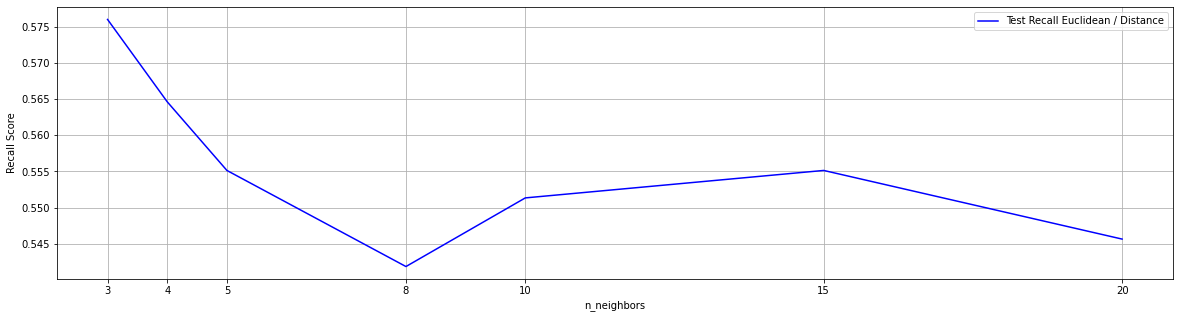

In [45]:
# Graph displaying Recall scores for each n_neighbor value

x_axis = grid_params['n_neighbors']
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_axis, recall_test_array_euclidean_distance,label = 'Test Recall Euclidean / Distance', c='b')

plt.xlabel('n_neighbors')
plt.ylabel('Recall Score')
plt.xticks([3,4,5,8,10,15,20])
plt.grid()
plt.legend()

We observe here that we see the maximum recall when we choose n_neighbors as 3.  

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
import warnings

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs','saga',] }

Logreg = GridSearchCV(LogisticRegression(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')
warnings.filterwarnings('ignore')


best_logreg = Logreg.fit(X_train, Y_train)
print("Best parameters: {}".format(Logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(Logreg.best_score_))
# Logreg.cv_results_

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.64


In [47]:
logL2= LogisticRegression(penalty= Logreg.best_params_['penalty'], C= Logreg.best_params_['C'], solver= Logreg.best_params_['solver'])
logL2.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(logL2.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(logL2.score(X_test, Y_test)))

Logreg_Y_predict = logL2.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,Logreg_Y_predict)))


train_score_l2 : 0.7109333333333333
test_score_l2 : 0.7096
Recall :0.6559


The best parameters for Logistic Regression model is C= 0.01, penalty= l1, solver= saga. When we run the model with these parameters, we get a Recall score of 0.66. We notice here that we have a better recall rate compared to that of KNN classifier.

We plot the 2 most important features and plot decision regions w.r.t a subset of these features.

[12 13  7  8 14 11 10  9 33 32  6  5  4  3  2  1 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31  0]


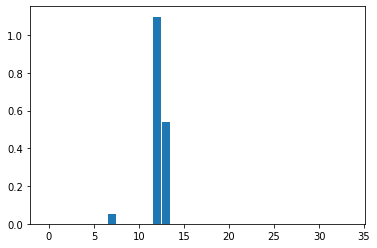

In [48]:

importance = abs(logL2.coef_[0])
importantFeatures = importance.argsort()[::-1][:2]
print(importance.argsort()[::-1])         

plt.bar([x for x in range(len(importance))], importance)
plt.show()

We see that columns 12, 13 are the most important features. Now we plot the graph wth only 100 rows so that we can see it more clearly.

<AxesSubplot:>

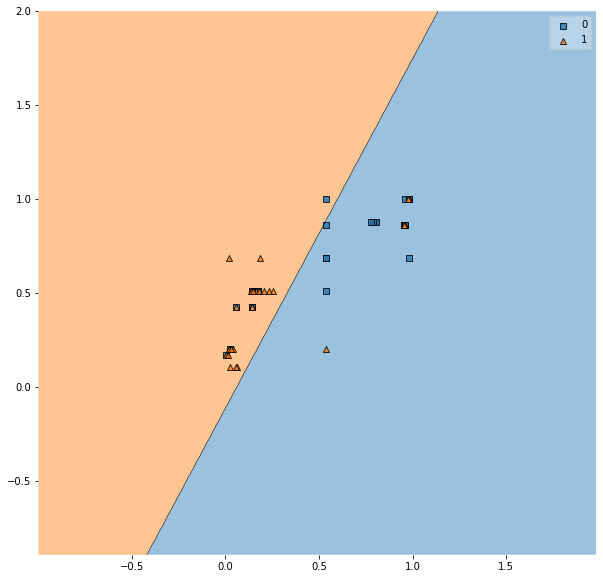

In [49]:
from mlxtend.plotting import plot_decision_regions
X_lr =  X_train[:100,importantFeatures]
Y_lr = Y_train[:100]

lr = LogisticRegression(C= 1000, penalty= 'l2', solver= 'saga')
lr.fit(X_lr, Y_lr)

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X_test[:100,importantFeatures], np.array(Y_test[:100]), clf = lr)


We notice that we have relatively small number of misclassifications of 'yes'.

# LinearSVC

In [50]:
from sklearn.svm import LinearSVC

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'random_state': [0] }

clf_lsvc = GridSearchCV(LinearSVC(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

best_lsvc = clf_lsvc.fit(X_train, Y_train)
print("Best parameters: {}".format(clf_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_lsvc.best_score_))

Best parameters: {'C': 0.01, 'penalty': 'l2', 'random_state': 0}
Best cross-validation score: 0.56


In [51]:
clf_ls= LinearSVC(penalty= clf_lsvc.best_params_['penalty'], C= clf_lsvc.best_params_['C'], random_state= clf_lsvc.best_params_['random_state'])
clf_ls.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(clf_ls.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_ls.score(X_test, Y_test)))

clf_ls_Ypredict = clf_ls.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_ls_Ypredict)))

train_score_l2 : 0.7557333333333334
test_score_l2 : 0.744
Recall :0.5913


Gridsearch with Linear SVC provides the following as best parameters: C= 100, penalty= l2. The model run with these two parameters give a test score of 0.74 and a Recall score of 0.59.  

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

grid_params ={'criterion': ['gini', 'entropy'], 'max_depth': [2,5,7], 'min_samples_leaf':[5,10,15],  'random_state': [0]}

clf_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

best_tree = clf_tree.fit(X_train, Y_train)
print("Best parameters: {}".format(clf_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_tree.best_score_))



Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'random_state': 0}
Best cross-validation score: 0.59


In [53]:
tree = DecisionTreeClassifier(**clf_tree.best_params_)
tree.fit(X_train, Y_train)

print("Train score: {:.4f}".format(tree.score(X_train, Y_train)))
print("Test score: {:.4f}".format(tree.score(X_test,Y_test)))

tree_Ypredict = tree.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,tree_Ypredict)))

Train score: 0.7659
Test score: 0.7552
Recall :0.5760


The best parameters obtained from the Grid Search are: criterion= 'entropy', max_depth= 7, min_samples_leaf= 15. The cross-validation score is 0.59 The decicion tree model run with these parameters provides a Recall score of 0.58.

In [54]:
bank.shape

(5000, 35)

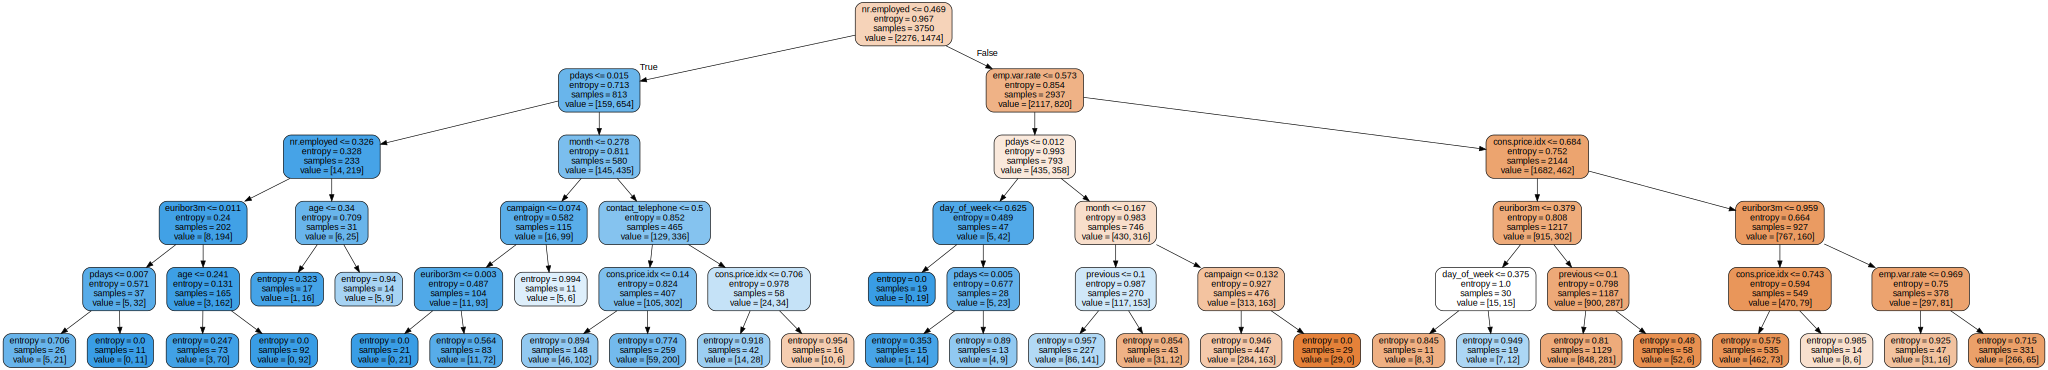

In [56]:
import os
import graphviz
# Create DOT data
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names= X.columns) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

The decision tree model first splits the tree on "nr.employed" and the second split on "emp.var.rate" and "poutcome_success". Entropy measures the impurity of every node. Samples are the number of records that are reaching that particular node. Orange colored nodes represent nodes that contain majority of the samples that have 'no' as the 'y' outcome. Blue nodes indicate that majority of the its samples have 'yes' as the outcome.  

In [57]:
from mlxtend.plotting import plot_decision_regions, category_scatter



In [58]:
import matplotlib
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5000 non-null   float64
 1   education             5000 non-null   int64  
 2   housing               5000 non-null   int64  
 3   loan                  5000 non-null   int64  
 4   month                 5000 non-null   int64  
 5   day_of_week           5000 non-null   int64  
 6   campaign              5000 non-null   float64
 7   pdays                 5000 non-null   float64
 8   previous              5000 non-null   float64
 9   emp.var.rate          5000 non-null   float64
 10  cons.price.idx        5000 non-null   float64
 11  cons.conf.idx         5000 non-null   float64
 12  euribor3m             5000 non-null   float64
 13  nr.employed           5000 non-null   float64
 14  y                     5000 non-null   int64  
 15  job_admin.           

<AxesSubplot:>

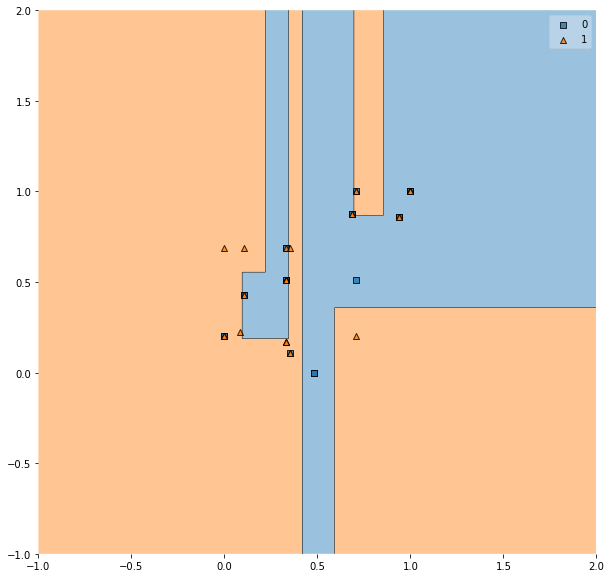

In [59]:
# The decision tree model first splits the tree on "nr.employed" 
# and the second split on "emp.var.rate" and "poutcome_success".
# For this graph showing decision boundary, 
#we are taking 2 of these 3 features: nr.employed (Feature: 13) and emp.var.rate (Feature: 9 ) and taking only 100 rows for better understanding.

X_b =  X_train[1:100,[9,13]]
y_b = Y_train[1:100]

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, np.array(y_b), clf = dtree)

We can see that there are some misclassifications of 'yes' as 'no', which affects the Recall value. 

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

grid_params ={'n_estimators': [100, 200, 500], 'max_depth': [2,4,6], 'min_samples_leaf':[5,10],  'random_state': [0], 'max_features' : [2]}

rf = GridSearchCV(RandomForestClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

rf.fit(X_train, Y_train)
print("Best parameters: {}".format(rf.best_params_))
print("Best cross-validation score: {:.2f}".format(rf.best_score_))


Best parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 0}
Best cross-validation score: 0.55


In [61]:
RForest= RandomForestClassifier(**rf.best_params_)
RForest.fit(X_train, Y_train)

print("Train score: {:.4f}".format(RForest.score(X_train, Y_train)))
print("Test score: {:.4f}".format(RForest.score(X_test, Y_test)))

RForest_Ypredict = RForest.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, RForest_Ypredict)))

Train score: 0.7701
Test score: 0.7672
Recall :0.5760


The best parameters for the model after Grid Search with cross-validation is max_depth= 6, max_features= 2, min_samples_leaf= 10, n_estimators= 100. With these parameters, we run the Random Forest , we get a test score of 0.77 and a recall score of 0.58.

# SVC with kernel

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score


grid_params ={'kernel': ['poly','rbf','linear'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}
#grid_params ={'kernel': ['linear', 'rbf', 'poly'], 'C': [0.01, 0.1, 1, 10], 'degree':[2,3,4],  'gamma': [0.1, 0.5, 0.7, 1]}

clf_ksvc = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = StratifiedKFold(n_splits=5, random_state=0,shuffle=True), scoring= 'recall',verbose=True)

best_ksvc = clf_ksvc.fit(X_train, Y_train)
print("Best parameters: {}".format(clf_ksvc.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_ksvc.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 0.1, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score: 0.68


In [63]:
clf_ks = SVC(kernel= clf_ksvc.best_params_['kernel'], degree=clf_ksvc.best_params_['degree'] , C= clf_ksvc.best_params_['C'], gamma= clf_ksvc.best_params_['gamma'])

clf_ks.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(clf_ks.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_ks.score(X_test, Y_test)))

clf_ks_Ypredict = clf_ks.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_ks_Ypredict)))


train_score_l2 : 0.7341333333333333
test_score_l2 : 0.7416
Recall :0.7053


We notice that SVC With kernel 'poly', degree '4' and C = 0.1 and gamma 0.1 provides the best Recall score of the available models at 0.70. 

# Conclusion

We have modeled KNN Classifier, Logistic Regression, Linear SVC, Kernel SVC, Decision Tree and Random Forest. Of all the models, Support Vector Classifier with Kernel = poly provides us the best model with a Recall Score of 0.70. 
Therefore, we select this model for classification purposes for future data.

Since this dataset involves predicting human behavior, the problem is quite complex which explains the general range of scores we obtained in all the models. For better models, we may need better features that could potentially explain better, the behavior of the target variable.  

We are using our best model, Kernalized SVC (poly, degree 4, C 0.1, gamma 0.1), to train the model on the train dataset. We use these hyperparameters to fit the train dataset and predict values for test set. 

In [68]:
clf_final_svc = SVC(kernel='poly', degree=4, C = 0.1, gamma= 0.1, random_state=0)
clf_final_svc.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(clf_final_svc.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_final_svc.score(X_test, Y_test)))

clf_final_svc_Ypredict = clf_final_svc.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_final_svc_Ypredict)))

train_score_l2 : 0.7341333333333333
test_score_l2 : 0.7416
Recall :0.7053


We get a Train Score of 0.73, Test Score of 0.74, and Recall Score of 0.70. The model correctly identifies 'yes' outcomes 70% of the time.